# IMDB Movie Dataset Analysis

## Background
We found an interesting dataset of more than 5000 data points consisting of 28 attributes describing IMDB movies here: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset.

You can read more about the data set here: https://blog.nycdatascience.com/student-works/machine-learning/movie-rating-prediction/. 

## Original Problem
Kaggle user **chuansun76** was trying to solve the following problem:
1. Given that thousands of movies were produced each year, is there a better way for us to tell the greatness of movie without relying on critics or our own instincts?
2. Will the number of human faces in movie poster correlate with the movie rating?

## Our Problem
We decided to tackle the problem by trying to answer the following questions: 
1. Is there a correlation between imdb scores and a movie's gross at the box office, are there any movies with a high gross-to-budget ratio, and why? 
2. Does the genre of a movie impact its success in the international markets (for instance, action movies might make a lot abroad because of their universal themes). 


# Data Collection

We provided to ways to obtain the data scraped by chuansun76, either downloading the data directly online or simply reading in the downloaded file from our inputs folder.

In [6]:
import pandas as pd
import requests
import csv

DATA_URL = "https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv"
FILE_PATH = "input/movie_metadata.csv"

def load_data_online(data_url):
    data = None
    
    SUCCESS = 200
    
    r = requests.get(data_url)
    if r.status_code == SUCCESS:
        # Decode data and read it into a DataFrame
        content = r.content.decode('utf-8')
        cr = csv.reader(content.splitlines(), delimiter=',')
        my_list = list(cr)
        data = pd.DataFrame(my_list[1:], columns=my_list[0])
        return data
    
# data = load_data_online(DATA_URL)
data = pd.read_csv(FILE_PATH)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data Processing

In [7]:
# Can do imputation to fill missing values
# Variable selection
# PCA

# data.describe()

x = 'imdb_score'
y = 'gross'



# TODO: WHAT TO DO WITH MISSING DATA?

In [8]:
# Subset data #1

subset_data = data.head(500)[[x, y]]
subset_data.sort_values(['imdb_score'], ascending=True, inplace=True)
subset_data.dropna(inplace=True)

# Exploratory Analysis and Data Visualization

<AxesSubplot:title={'center':'Imdb score vs. gross profit'}, xlabel='imdb_score', ylabel='gross'>

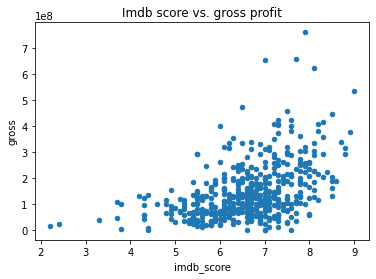

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

subset_data.plot(title="Imdb score vs. gross profit",x=x, y=y, kind='scatter')

Next I wanted to analyze if genre played a role in the correlation betwen imdb score and gross. In our original data set, each movie could have multiple genres and so I split each row into multiple based on how many genres the movies were classified as part of. 

In [10]:
import pandas as pd
# Subset data #2
subset_data2 = pd.DataFrame(columns=[x, y, 'genre'])

i = 0
values = []
for idx, row in data.iterrows():
    genres_val = row['genres']
    
    if not pd.isnull(genres_val) and not pd.isnull(row['gross']):
        for genre in genres_val.split('|'):
            values.append([row[x], row[y], genre])    
        
#         i += 1
#         if i == 1500:
#             break
        
subset_data2 = pd.DataFrame(values, columns=[x, y, 'genre'])
subset_data2 = subset_data2.groupby(['imdb_score', 'genre'], as_index=False).mean()

<AxesSubplot:xlabel='genre'>

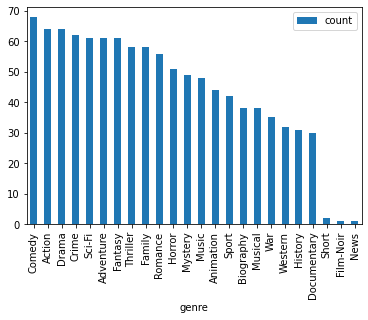

In [11]:
count = subset_data2['genre'].value_counts()
# df.reset_index(level=0, inplace=True)
# count_df = pd.DataFrame(count, columns=['count'])
# count_df
count_df = pd.DataFrame(count)
count_df.reset_index(inplace=True)
count_df.columns = ['genre', 'count']
count_df.plot(x='genre', y='count', kind='bar')

The above histogram illustrates that there is not enough data for "Short", "Film-Noir", and "News" so we will omit that from the analysis.

In [12]:

ommitted_columns = ["Short", "Film-Noir", "News"]
subset_data2 = subset_data2[~subset_data2['genre'].isin(ommitted_columns)]

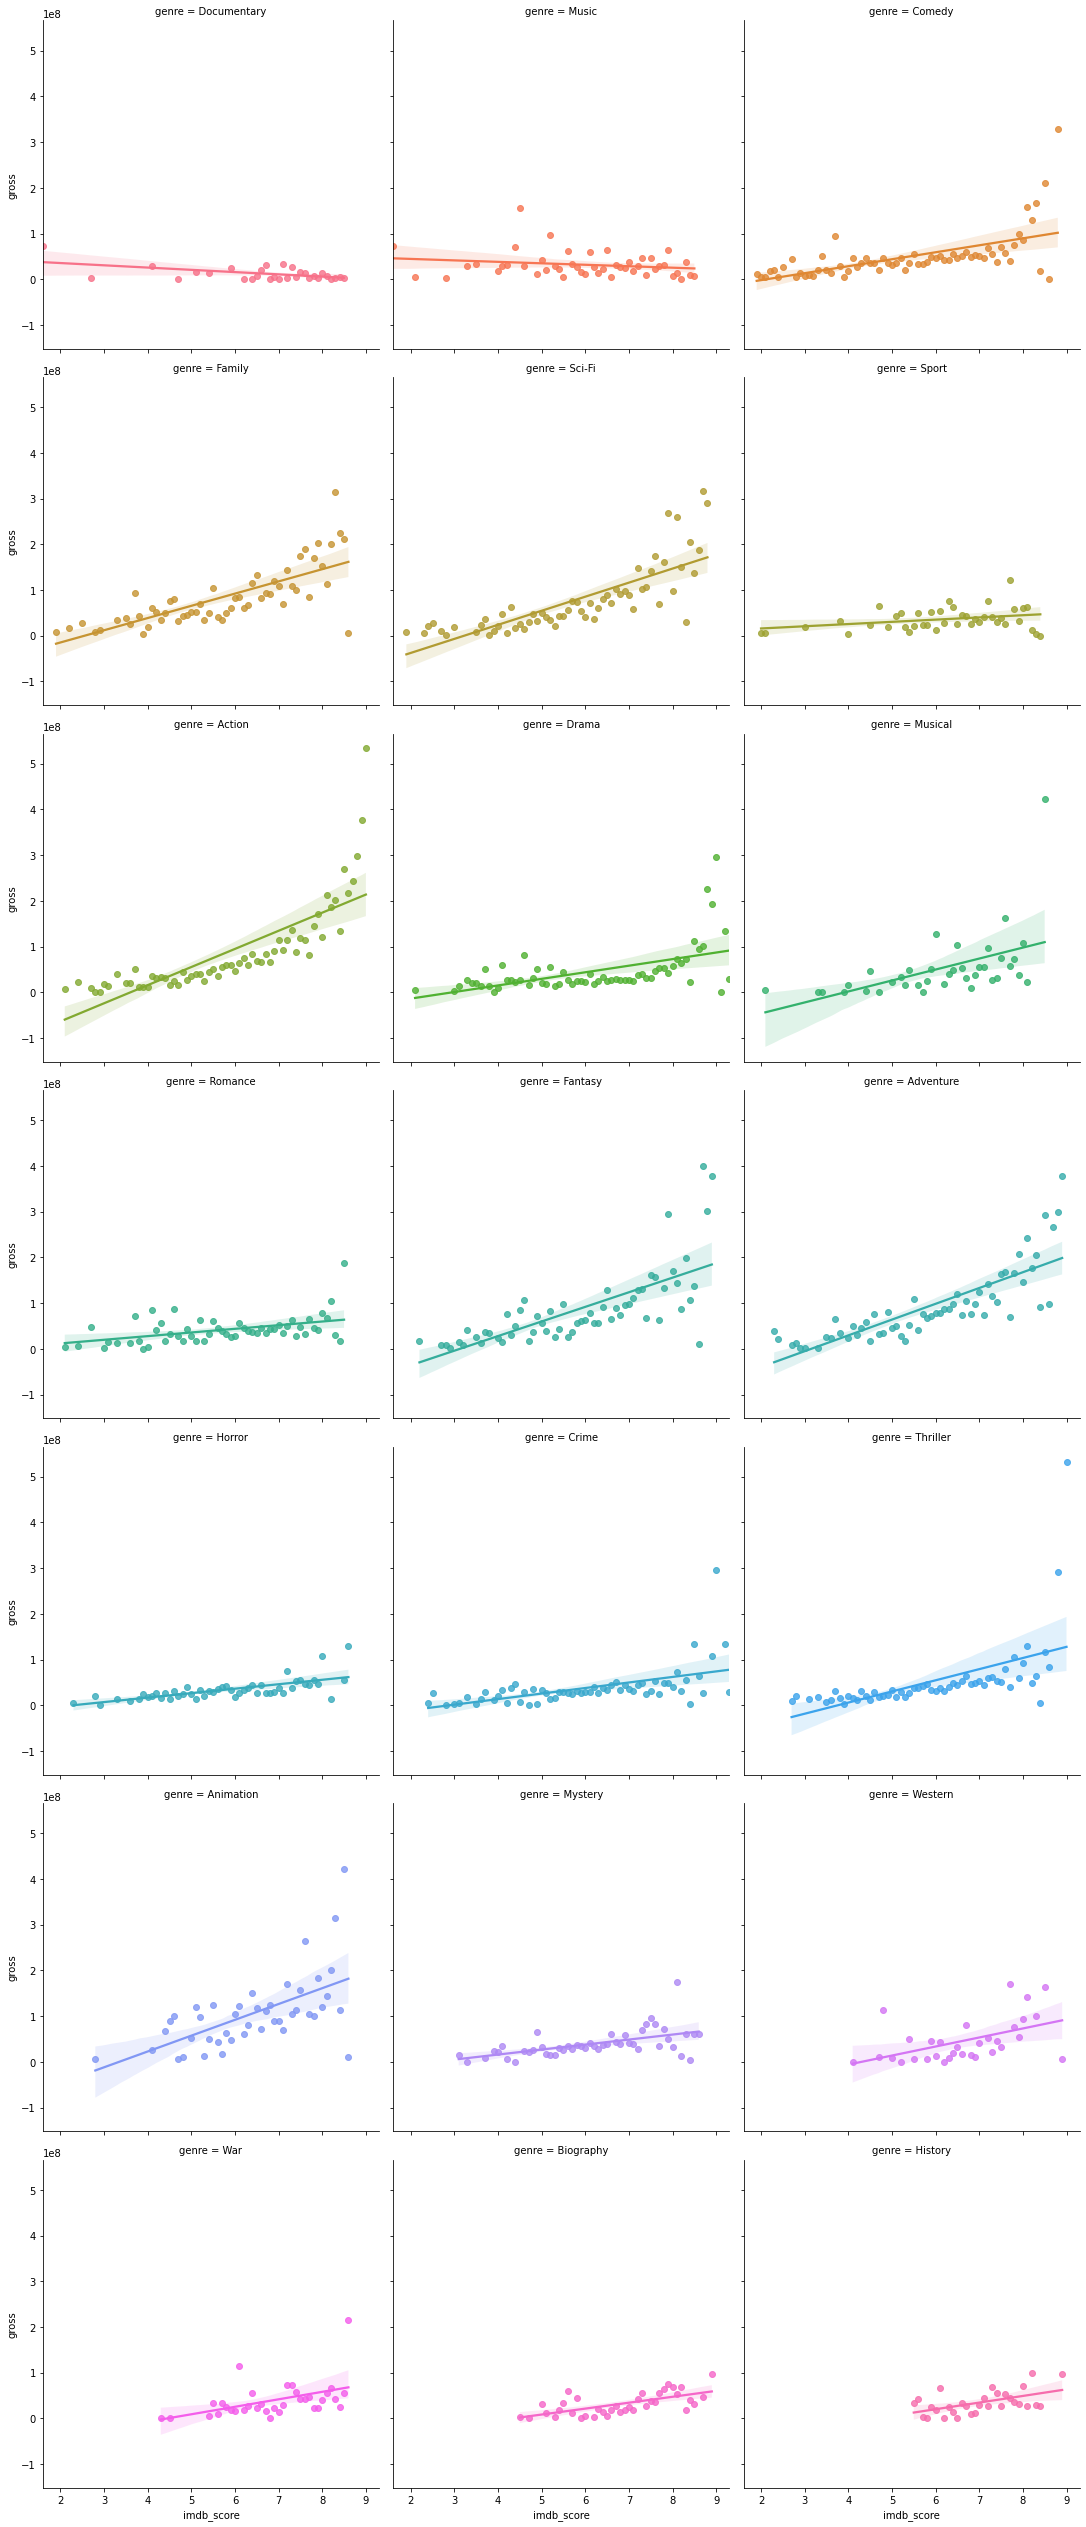

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the data
g = sns.lmplot(x=x, y=y, data=subset_data2, col="genre", hue="genre", scatter=True, fit_reg=True, col_wrap=3)
plt.show()

# Analysis, Hypothesis Testing, and ML

In [14]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [15]:
import statsmodels.api as sm

new_data = data.dropna()

x_columns = ['imdb_score', 'budget', 'num_critic_for_reviews', 'director_facebook_likes',
             'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
             'movie_facebook_likes', 'cast_total_facebook_likes']
y_column = 'gross'


X = [list(row.values) for _, row in new_data[x_columns].iterrows()]
X_OLS = sm.add_constant(X)
y = new_data[y_column].values


model = sm.OLS(y, X_OLS)
model.data.xnames = ['const'] + x_columns
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          1.85e-284
Time:                        12:10:30   Log-Likelihood:                -72520.
No. Observations:                3756   AIC:                         1.451e+05
Df Residuals:                    3746   BIC:                         1.451e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -2.869e+07   6.23e+06     -4.607      0.000   -4.09e+07   -1.65e+07
imdb_score                 5.096e+06   9.86e+05      5.168      0.000    3.16e+06    7.03e+06
budget                        0.0151      0.004      3.527      0.000       0.007       0.023
num_critic_for_reviews     1.939e+05   1.14e+04     16.983      0.000    1.72e+05    2.16e+05
director_facebook_likes     734.0652    322.724      2.275      0.023     101.333    1366.797
actor_1_facebook_likes     -1.29e+04    880.997    -14.648      0.000   -1.46e+04   -1.12e+04
actor_2_facebook_likes    -1.237e+04    931.336    -13.286      0.000   -1.42e+04   -1.05e+04
actor_3_facebook_likes    -1.366e+04   1467.171     -9.311      0.000   -1.65e+04   -1.08e+04
movie_facebook_likes        101.7738     63.895      1.593      0.111     -23.499     227.047
cast_total_facebook_likes  1.295e+04    877.746     14.750      0.000    1.12e+04    1.47e+04
==============================================================================
Omnibus:                     1934.702   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21377.860
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      13.825   Cond. No.                     1.51e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next I'm going to use **decision trees** and **cross validation**.

Decision trees are a type of machine learning classifier that attempts to predict a value based on a set of decision rules. Decision trees learn from data in order to create a set of decision rules (if-then-else statements) that predicts values.  

Cross validation is a way of testing if our classification works well. We are given a set of data in which we choose to split it up into two groups known as training and testing (normally there is a lot more training data than testing so it's usually skewed towards something like 70/30 split). We will use the training data to allow our decision tree to be built. Then we will use the testing data in order to see how well our classifier does. If it doens't do as well as we expected, we may have overfitted our classifier on the training data and so we may need to prune the tree by changing specific parameters. This is the basic rundown for cross validation.

You can learn more about these machine learning concepts from the sklearn documentation found here:

*Decision Trees:* http://scikit-learn.org/stable/modules/tree.html
*Cross Validation:* http://scikit-learn.org/stable/modules/cross_validation.html

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

classifier = tree.DecisionTreeRegressor(min_samples_split=3)
y_pred = classifier.fit(X_train, y_train).predict(X_val)
# accuracy_training = accuracy_score(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
r2

0.11275355643241347

# Insight & Policy Decision

In [17]:
# Our analysis seems to indicate that IMDB score correlates positively with a film's real domestic gross at the box office, as well as budget, and cast facebook likes. More research has to be conducted to yield models that fit our data better and predict a film's gross in a more sensible and intuitive way. Some next steps could be to construct a model based on film genre, and see if that impacts a film's gross and ROI, and to what extent. Also, what features do films with a high ROI and gross have in common? All in all, this study shed some interesting light on the economics and patterns behind films produced in the USA.